In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:

def analyze_data(fpath):
    with open(fpath, 'r') as f:
        meta = json.load(f)
    print(f'avg score: {meta[-1]['reduced score']}')
    score_dist_first_70 = [meta[i]['score'] for i in range(70)]
    score_dist_after_70 = [meta[i]['score'] for i in range(70, len(meta)-1)]
    print(f'avg score first 70: {sum(score_dist_first_70)/len(score_dist_first_70)}')
    print(f'avg score after 70: {sum(score_dist_after_70)/len(score_dist_after_70)}')
    # show score distribution
    plt.hist(score_dist_first_70, bins=20, alpha=0.5, label='first 70')
    plt.hist(score_dist_after_70, bins=20, alpha=0.5, label='after 70')
    plt.legend(loc='upper right')
    plt.show()

avg score: 0.6098
avg score first 70: 0.6389999999999999
avg score after 70: 0.5416666666666666


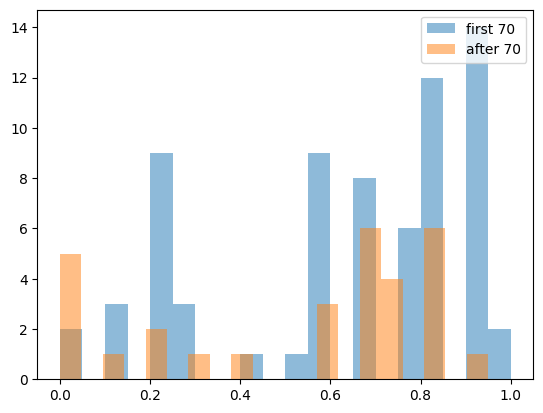

In [3]:
analyze_data('/mnt/ssd4/lm_compiler/examples/IR_matplot_agent/raw_test_4o/raw_test_result.log')

avg score: 0.4606
avg score first 70: 0.5037142857142857
avg score after 70: 0.36


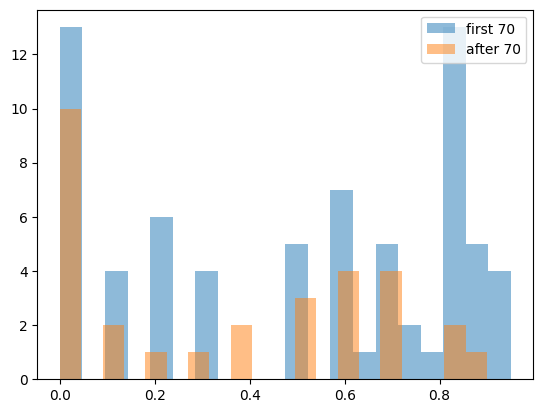

In [4]:
analyze_data('/mnt/ssd4/lm_compiler/examples/IR_matplot_agent/raw_test_4o_mini/raw_test_result.log')

In [8]:
with open('/mnt/ssd4/lm_compiler/examples/IR_matplot_agent/benchmark_data/benchmark_instructions.json', 'r') as f:
    input_data = json.load(f)
train_size = 50

num_train_first_70 = train_size * 70 // 100
num_train_after_70 = train_size - num_train_first_70
# randomly sample from first 70 and last 30 independently
np.random.seed(0)

# get indice first
train_data_indices = sorted(np.random.choice(range(70), num_train_first_70, replace=False).tolist() + \
                np.random.choice(range(70, len(input_data)), num_train_after_70, replace=False).tolist())
                
# testset takes the rest
test_data_indices = sorted(list(set(range(len(input_data))) - set(train_data_indices)))

train_data = [input_data[i] for i in train_data_indices]
test_data = [input_data[i] for i in test_data_indices]

# save to file
with open('/mnt/ssd4/lm_compiler/examples/IR_matplot_agent/benchmark_data/train_data.json', 'w') as f:
    json.dump(train_data, f, indent=4)
    
with open('/mnt/ssd4/lm_compiler/examples/IR_matplot_agent/benchmark_data/test_data.json', 'w') as f:
    json.dump(test_data, f, indent=4)